In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [4]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
cols = df.columns
cols

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [7]:
corr_matrix = df.corr()
corr_matrix

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

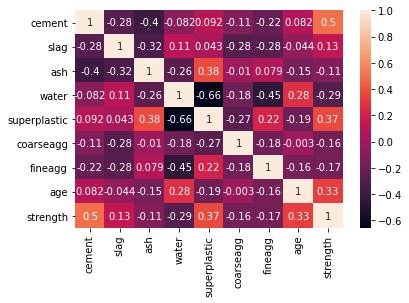

In [8]:
sns.heatmap(corr_matrix, annot=True)

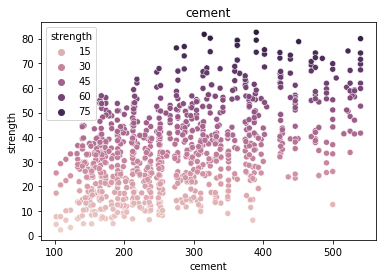

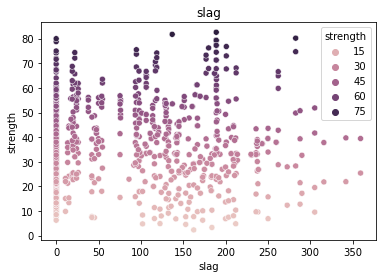

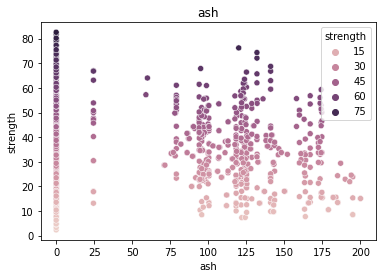

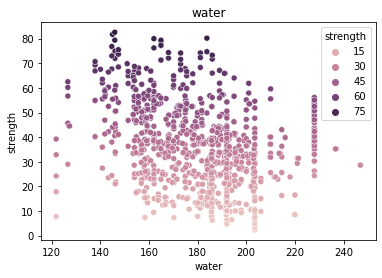

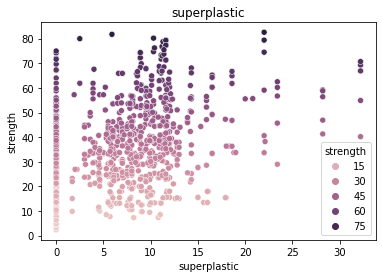

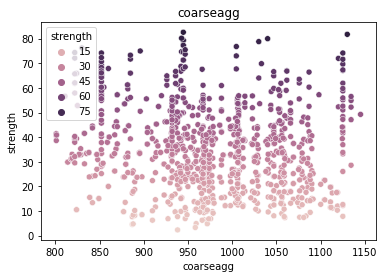

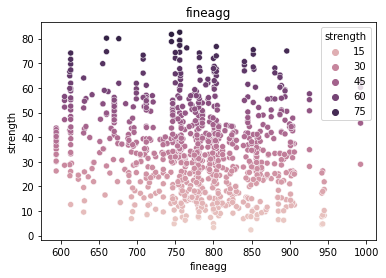

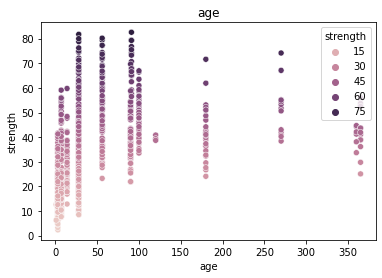

In [9]:
feature_cols = [col for col in cols if not col=='strength']
for col in feature_cols:
    sns.scatterplot(data=df,x=col,y='strength', hue='strength')
    plt.title(col)
    plt.show()

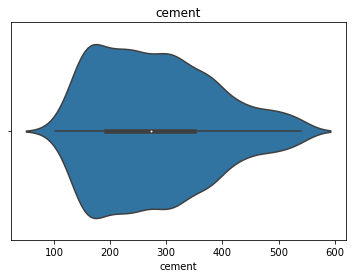

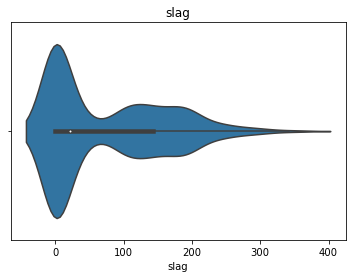

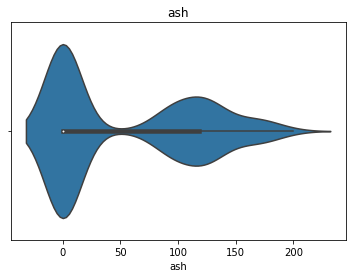

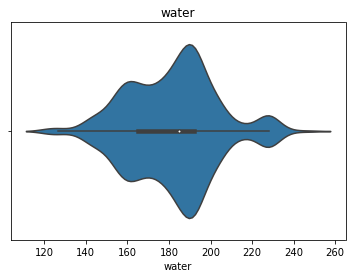

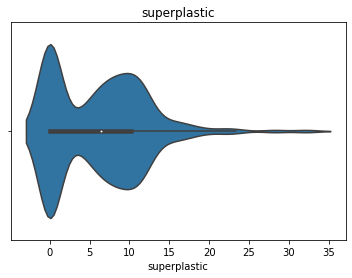

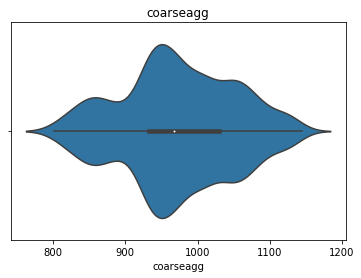

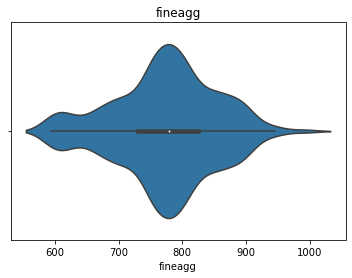

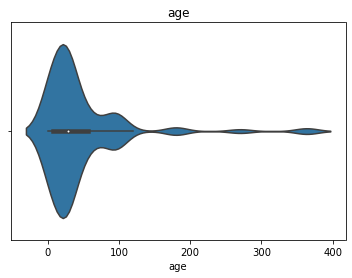

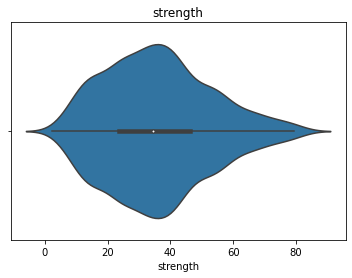

In [10]:
for col in cols:
    sns.violinplot(data=df, x=col)
    plt.title(col)
    plt.show()

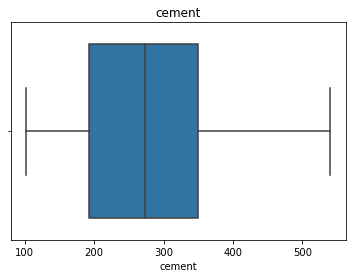

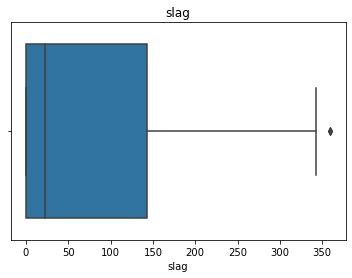

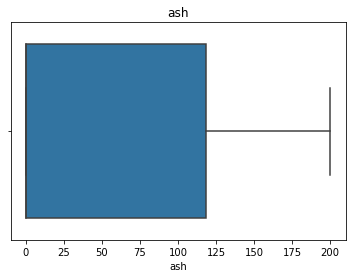

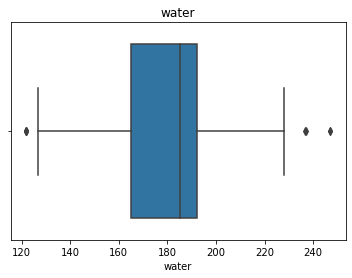

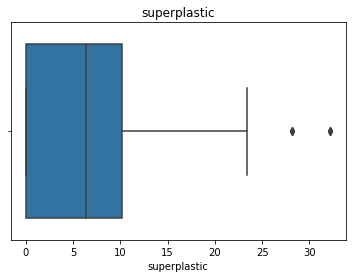

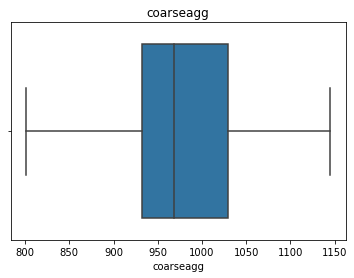

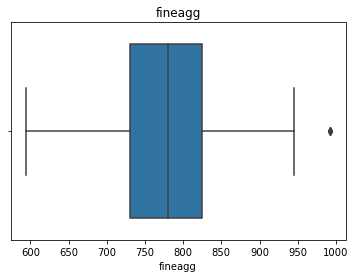

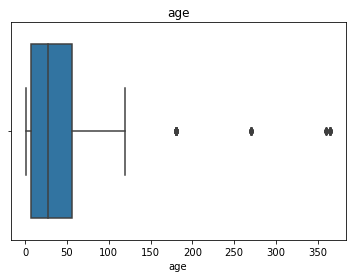

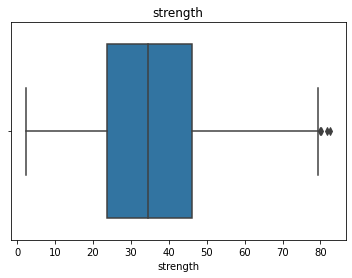

In [11]:
for col in cols:
    sns.boxplot(data=df,x=col)
    plt.title(col)
    plt.show()

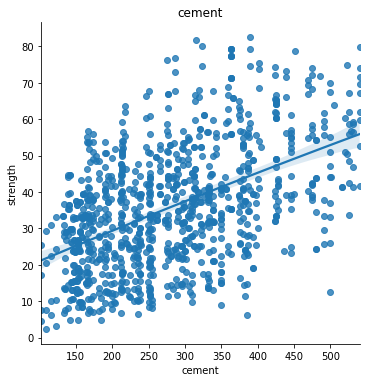

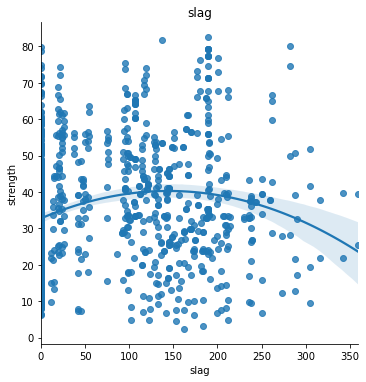

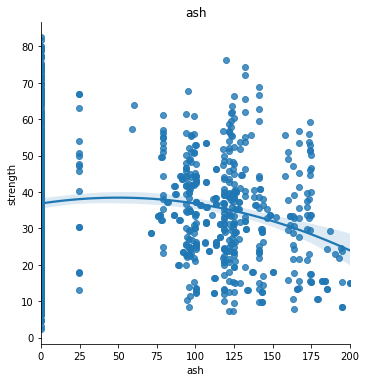

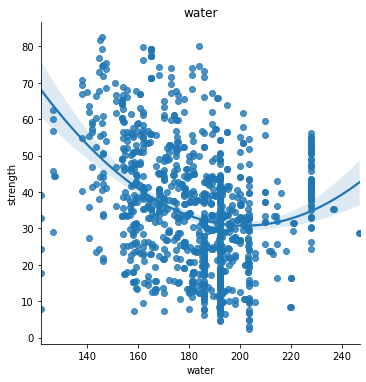

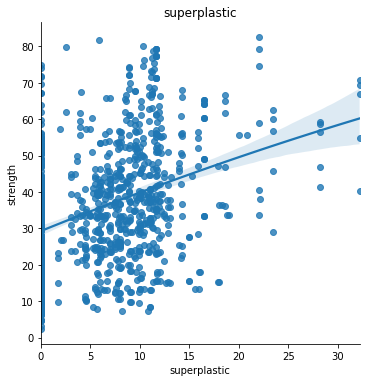

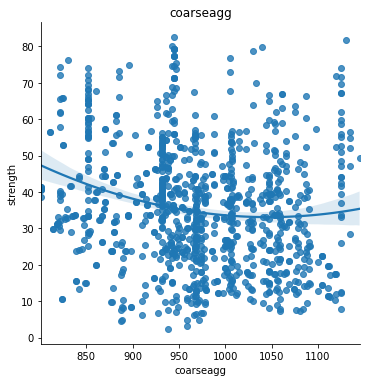

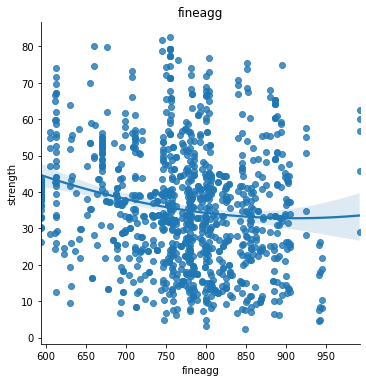

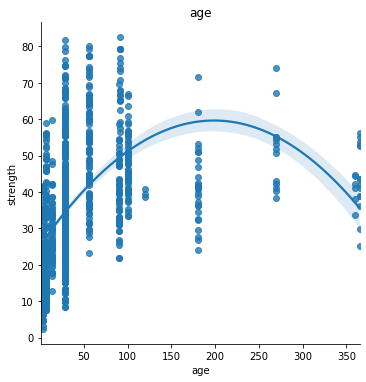

In [13]:
for col in feature_cols:
    sns.lmplot(x =col, y ='strength', data=df, order = 2)
    plt.title(col)
    plt.show()

In [16]:
train_df = df[feature_cols]
test_df = df['strength']
Xtrain, Xtest, ytrain, ytest = train_test_split(train_df, test_df, test_size=0.3, random_state=13)
print('Xtrain: ',Xtrain.shape)
print('ytrain: ',ytrain.shape)
print('Xtest: ',Xtest.shape)
print('y_test: ',ytest.shape)

Xtrain:  (721, 8)
ytrain:  (721,)
Xtest:  (309, 8)
y_test:  (309,)


In [17]:
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [18]:
pred = model.predict(Xtest)
pred

array([27.58840162, 45.73027176, 53.35505968, 38.95914498, 30.78465429,
       21.86508371, 29.73076933, 42.48618531, 14.90043189, 58.31259816,
       36.89285052, 36.97906254, 51.78267391, 27.16703666, 17.70451218,
       14.20932965, 47.4564869 , 54.33037662, 48.49238156, 46.49142507,
       33.26193753, 28.78136467, 34.12989507, 47.36352053, 57.37673253,
       32.25091086, 29.35631255, 20.53004314, 47.41643729, 56.70363403,
       32.94587745, 28.67567511, 43.06906722, 60.08984866, 34.15242287,
       23.36139558, 44.76121044, 42.96631819, 34.56189745, 47.87788612,
       26.35105702, 18.25373545, 17.08218386, 52.76314737, 41.29934915,
       31.41784851, 42.53795671, 48.32790944, 32.12175253, 27.58139918,
       25.31490646, 20.85586124, 14.7038478 , 58.09281164, 35.67354343,
       19.81829316, 55.73339574, 44.11825558, 13.21596223, 50.28296626,
       30.80484994, 14.55155556, 19.98327675, 13.19258368, 22.83384099,
       20.70973972, 28.45584503, 46.25356371, 63.89728006, 23.02

In [25]:
print('model score')
print('mean abosolute error:', metrics.mean_absolute_error(ytest, pred))
print('mean square error:', metrics.mean_squared_error(ytest, pred))

model score
mean abosolute error: 8.481152665647228
mean square error: 113.72233430791636
